# Study of the narrative
Study of the narrative through sets of hands presented together within a painting and its corresponding iconography
- Get significant KMeans clusters
- Group hands from same painting through their cluster representations
- Compare patterns within same iconographies


## Imports

In [1]:
import os
import cv2
import threading
import time
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sys
import imageio
import random
import sqlite3
import itertools
import json
import shutil
import ntpath
import math
import pandas as pd

from time import sleep
from datetime import datetime
from ipynb.fs.full.write_html import write_html, write_js
from random import randint
from random import randrange

import KPmanager

In [2]:
with open('cluster_labels_kmeans_pca_all.pkl','rb') as f:
    labels_kmeans_pca = pickle.load(f)

In [3]:
with open('cluster_labels_spectral_all.pkl','rb') as f:
    labels_spectral =  pickle.load(f)

In [4]:
with open('all_hands_images.pkl', 'rb') as handle:
    files_name = pickle.load(handle)

In [5]:
with open('all_hands_features_JOINT_UNIT.pkl', 'rb') as handle:
    hands_features = pickle.load(handle)

In [6]:
with open('iconclass_dic.pkl', 'rb') as handle:
    iconclass_dic = pickle.load(handle)

In [10]:
iconclass_dic

{'11H': 'saints',
 '71P': 'the story of the prophet Daniel; his visions and prophecies',
 '11I': 'prophets, sibyls, evangelists, Doctors of the Church; persons ~ the Bible (not in biblical context)',
 '71O': 'prophets (before and during the Babylonian Captivity)',
 '11B': "the Holy Trinity, 'Trinitas coelestis'; Father, Son and Holy Ghost ~ Christian religion",
 '43A': 'festivities',
 '73F': 'lives and acts of the apostles of Christ; epistles',
 '71S': 'prophets (after the Babylonian Captivity)',
 '71C': 'Genesis: the patriarchs',
 '33A': 'non-aggressive relationships',
 '71D': 'Genesis: the story of Joseph',
 '48C': 'the arts; artists',
 '71A': 'Genesis from the creation to the expulsion from paradise, and later years of Adam and Eve',
 '11E': 'the Holy Ghost',
 '73C': 'public life of Christ: from his baptism until the Passion',
 '73B': 'birth and youth of Christ',
 '73E': "events from Resurrection to Pentecost (Matthew 28; Mark 16; Luke 24; John 20-21; Acts 1:3-11); Mary's and Joseph

In [8]:
DB_df_ = pd.read_pickle("./DB_df_keywords_DE.pkl")

In [228]:
DB_df_.loc[DB_df_['iconography_main'] == '11H']

,index,object_ID,title,artist_GND,artist_name,date_begin,date_end,current_location,type,medium,dimensions,img_digital,century,id,keywords,iconography_main,iconography
54,54,8055384,Die Heiligen Scholastika und Benedikt empfange...,ulan500017301 & gnd123097843,Paolo de Matteis,1685.0,1725.0,Cava de' Tirreni,Gemälde,Öl,225 x 180 cm,bhim00035651,1650.0,bhim00035651_2_hand_right.jpg,"[[(11H, 1450), (71P, 119), (11I, 71), (71O, 41...",11H,saints
127,127,8029436,Himmelfahrt der heiligen Maria Magdalena,unknown,unknown,1601.0,1700.0,unknown,Gemälde,Öl :,"53 x 37,5 cm",bhim00034185,1600.0,bhim00034185_1_hand_right.jpg,"[[(11H, 1491), (11F, 221), (73B, 154), (73A, 1...",11H,saints
236,236,8089029,Die büßende Maria Magdalena,ulan500017753 & gnd11919404X,Guido Canlassi,1619.0,1663.0,unknown,Gemälde,Öl,86 x 72 cm,bhim00037042,1600.0,bhim00037042_0_hand_left.jpg,"[[(11H, 589), (11F, 221), (73B, 150), (73A, 14...",11H,saints
346,346,8028848,Bildnis des Lorenzo Colonna,ulan500026055 & gnd118714937,Jan Stephan von Calcar,1540.0,1540.0,unknown,Gemälde,Öl & Leinwand,"114,5 x 89,5 cm",bhim00017328,1500.0,bhim00017328_0_hand_right.jpg,"[[(11H, 313), (11D, 29), (95A, 6), (42E, 3), (...",11H,saints
406,406,8047317,Madonna mit den sieben heiligen Ordensgründern,ulan500028642 & gnd121823768,Agostino Masucci,1727.0,1727.0,Rom,Gemälde,Öl & Leinwand,340 x 215 cm,bhim00006372,1700.0,bhim00006372_0_hand_left.jpg,"[[(11H, 1345), (11F, 131), (11E, 7), (73B, 4),...",11H,saints
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187141,187141,8011794,Thronende Madonna mit den heiligen Dominikus u...,ulan500124891,Ercole Grandi,1481.0,1525.0,unknown,Gemälde,unknown,unknown,bh012154,1450.0,bh012154_2_hand_right.jpg,"[[(11H, 1284), (11F, 147), (11D, 8), (11E, 7),...",11H,saints
187203,187203,8042820,Maria mit Engeln (Vorderseite) und Christus Sa...,unknown,unknown,1101.0,1200.0,Vetralla,Gemälde,unknown,unknown,bhim00008534,1100.0,bhim00008534_0_hand_left.jpg,"[[(11H, 417), (73C, 401), (11D, 278), (11F, 22...",11H,saints
187228,187228,8109420,Heiliger Petrus und heiliger Paulus,ulan500003126 & gnd11865750X,Giacomo Bassano,1528.0,1592.0,unknown,Gemälde,Leinwand & Öl,228 x 123 cm,bh002581,1500.0,bh002581_0_hand_right.jpg,"[[(11H, 2254), (73F, 287), (73E, 24), (73C, 16...",11H,saints
187409,187409,8029459,Ekstase des heiligen Franziskus,ulan500031281 & gnd121865665,Filippo Lauri,1641.0,1694.0,unknown,Gemälde,Öl :,"46 x 35,2 cm",bhim00034221,1600.0,bhim00034221_0_hand_right.jpg,"[[(11H, 1239), (11E, 7), (94O, 6), (73B, 4), (...",11H,saints


In [11]:
iconography_key = []
iconography_name = []

for index, row in DB_df_.iterrows():
    if len(row['keywords'][0])>0:
        key = row['keywords'][0][0][0]

        iconography_key.append(key)
        iconography_name.append(iconclass_dic[key])
    else:
        iconography_key.append('None')
        iconography_name.append('None')

In [12]:
DB_df_['iconography_main'] = iconography_key
DB_df_['iconography'] = iconography_name

In [13]:
print(files_name[0])
print(labels_kmeans_pca[0])
print(labels_spectral[0])

bhim00037788_0_hand_right.jpg
6
18


In [14]:
cluster_pairs = list(zip(files_name, labels_spectral))

In [15]:
cluster_pairs[0]

('bhim00037788_0_hand_right.jpg', 18)

In [16]:
hands_combination = {}
for file_name, label in zip(files_name, labels_spectral):
    img_digital = DB_df_.loc[DB_df_['id'] == file_name, 'img_digital'].values[0]
    if img_digital in hands_combination:
        hands_combination[img_digital].append(label)
        continue
    hands_combination[img_digital] = [label]

In [17]:
hands_combination

{'bhim00037788': [18, 47],
 'bh012186': [3],
 'bh013263': [6, 21],
 'bhim00037212': [28, 34, 2, 36, 0, 10, 45],
 'bh012634': [22],
 'bhim00024287': [3],
 'bhim00017401': [19],
 'bh013929': [24],
 'bhim00017456': [25],
 'bh007998': [47],
 'bh052628': [9, 25],
 'bhim00015955': [13],
 'bhim00033989': [31],
 'bh000775': [4, 36, 14],
 'bh012303': [19],
 'bh002682': [37],
 'bh013546': [29, 17, 45],
 'bh013200': [19, 24, 36, 44],
 'bh013091': [7, 0, 37, 45, 37],
 'bhim00037058': [6, 19, 45, 14, 15, 21, 31],
 'bh012280': [18, 32],
 'bh001533': [6],
 'bh002586': [5, 39, 26, 32, 25, 3],
 'bh013231': [44, 4, 47],
 'bhim00017293': [22],
 'bhim00038638': [36],
 'bh013276': [6],
 'bhim00024435': [3],
 'bh209938': [18, 47, 34],
 'bhpd68259': [3, 37],
 'bhim00024342': [17],
 'bh001993': [19],
 'bhim00027728': [26, 1, 14],
 'bh013281': [19, 26],
 'bhim00017324': [43, 45, 36, 19],
 'bhim00037194': [25],
 'bhim00037841': [22, 15, 11, 44, 5, 5],
 'bh012257': [7],
 'bh000889': [12, 14],
 'bhim00038652': [3

In [18]:
for key, item in hands_combination.items():
    hands_combination[key] = sorted(item)

In [19]:
hands_combination

{'bhim00037788': [18, 47],
 'bh012186': [3],
 'bh013263': [6, 21],
 'bhim00037212': [0, 2, 10, 28, 34, 36, 45],
 'bh012634': [22],
 'bhim00024287': [3],
 'bhim00017401': [19],
 'bh013929': [24],
 'bhim00017456': [25],
 'bh007998': [47],
 'bh052628': [9, 25],
 'bhim00015955': [13],
 'bhim00033989': [31],
 'bh000775': [4, 14, 36],
 'bh012303': [19],
 'bh002682': [37],
 'bh013546': [17, 29, 45],
 'bh013200': [19, 24, 36, 44],
 'bh013091': [0, 7, 37, 37, 45],
 'bhim00037058': [6, 14, 15, 19, 21, 31, 45],
 'bh012280': [18, 32],
 'bh001533': [6],
 'bh002586': [3, 5, 25, 26, 32, 39],
 'bh013231': [4, 44, 47],
 'bhim00017293': [22],
 'bhim00038638': [36],
 'bh013276': [6],
 'bhim00024435': [3],
 'bh209938': [18, 34, 47],
 'bhpd68259': [3, 37],
 'bhim00024342': [17],
 'bh001993': [19],
 'bhim00027728': [1, 14, 26],
 'bh013281': [19, 26],
 'bhim00017324': [19, 36, 43, 45],
 'bhim00037194': [25],
 'bhim00037841': [5, 5, 11, 15, 22, 44],
 'bh012257': [7],
 'bh000889': [12, 14],
 'bhim00038652': [3

## PREPARE table

In [22]:
from_ = []
to_ = []
icon_ = []
#century_ = []
image_ = []
for key, combination in hands_combination.items():
    pairs = [(a, b) for idx, a in enumerate(combination) for b in combination[idx + 1:]]
    for (a, b) in pairs:
        from_.append(a)
        to_.append(b)
        icon_.append(DB_df_.loc[DB_df_['img_digital'] == key, 'iconography'].values[0])
        image_.append(key)
        #century_.append(DB_df_.loc[DB_df_['img_digital'] == key, 'century'].values[0])

In [23]:
#century_[3]
image_[0]

'bhim00037788'

In [139]:
#edge_df_ = pd.DataFrame(list(zip(from_, to_, icon_, century_)),columns=['source', 'target', 'legend', 'century']) #source #target

edge_df_ = pd.DataFrame(list(zip(from_, to_, icon_, image_)),columns=['source', 'target', 'legend', 'image']) #source #target

In [140]:
print(len(edge_df_))
edge_df_.head(5)

8340


,source,target,legend,image
0,18,47,saints,bhim00037788
1,6,21,Christ,bh013263
2,0,2,betrothal and marriage,bhim00037212
3,0,10,betrothal and marriage,bhim00037212
4,0,28,betrothal and marriage,bhim00037212


In [142]:
#edge_df_.loc[edge_df_['legend']=='betrothal and marriage']

In [143]:
edge_df_ = edge_df_.drop_duplicates()

In [144]:
edge_df_.head()

,source,target,legend,image
0,18,47,saints,bhim00037788
1,6,21,Christ,bh013263
2,0,2,betrothal and marriage,bhim00037212
3,0,10,betrothal and marriage,bhim00037212
4,0,28,betrothal and marriage,bhim00037212


In [145]:
edge_df_ = edge_df_.groupby(['source', 'target', 'legend']).image.apply(list).reset_index()

In [146]:
edge_df_

,source,target,legend,image
0,0,0,gods of the waters: the older dynasty (first s...,[bh102378]
1,0,0,lesser divinities of Heaven ~ serving and atte...,[bhim00036998]
2,0,0,saints,"[bhim00012232, bhim00034078, bhim00033567]"
3,0,1,gods of the earth and fertility ~ life in moun...,[bhim00038611]
4,0,1,saints,[bhim00009148]
...,...,...,...,...
3749,47,48,saints,[bh000922]
3750,47,49,male persons from classical history,[bh013346]
3751,48,48,saints,[bhim00027604]
3752,48,49,lives and acts of the apostles of Christ; epis...,[bhim00034316]


In [148]:
len(edge_df_)

3754

In [32]:
#edge_df = edge_df_.loc[edge_df_['legend'] == 'birth and youth of Christ']

In [149]:
#edge_df_['century'] = edge_df_['century'].astype(str)
edge_df_['image'] = edge_df_['image'].astype(str)

In [62]:
#edge_df = edge_df_.drop_duplicates()
#edge_df = edge_df_.loc[edge_df_.astype(str).drop_duplicates().index]

In [150]:
edge_df = edge_df_

In [151]:
len(edge_df)

3754

In [152]:
nodes = [i for i in range(50)]
nodes_names = [str(i) for i in range(50)]

In [153]:
node_df = pd.DataFrame(list(zip(nodes, nodes_names)), columns = ['id', 'name'])

In [162]:
edge_df.head(3)

,source,target,legend,image
0,0,0,gods of the waters: the older dynasty (first s...,['bh102378']
1,0,0,lesser divinities of Heaven ~ serving and atte...,['bhim00036998']
2,0,0,saints,"['bhim00012232', 'bhim00034078', 'bhim00033567']"


In [163]:
node_df.head(3)

,id,name
0,0,0
1,1,1
2,2,2


In [164]:
count_icon = []
count_edge = []
#centuries = []
for key, row in edge_df_.iterrows():
    #dup = edge_df_.loc[((edge_df_['source']==row['source']) | (edge_df_['source']==row['target'])) 
     #                  & ((edge_df_['target']==row['target']) | (edge_df_['target']==row['source'])) 
      #                 & (edge_df_['legend']==row['legend'])]
    
    dup_edge = len(edge_df_.loc[(edge_df_['source']==row['source'])
                             & (edge_df_['target']==row['target'])])
    
    dup_icon = len(row['image'])
    
    #cent = edge_df_.loc[(edge_df_['source']==row['source']) & (edge_df_['target']==row['target']), 'century']
    count_icon.append(dup_icon)
    count_edge.append(dup_edge)

In [165]:
edge_df_['weight_icon'] = count_icon
edge_df_['weight_edge'] = count_edge

In [166]:
edge_df_

,source,target,legend,image,weight_icon,weight_edge
0,0,0,gods of the waters: the older dynasty (first s...,['bh102378'],12,3
1,0,0,lesser divinities of Heaven ~ serving and atte...,['bhim00036998'],16,3
2,0,0,saints,"['bhim00012232', 'bhim00034078', 'bhim00033567']",48,3
3,0,1,gods of the earth and fertility ~ life in moun...,['bhim00038611'],16,2
4,0,1,saints,['bhim00009148'],16,2
...,...,...,...,...,...,...
3749,47,48,saints,['bh000922'],12,1
3750,47,49,male persons from classical history,['bh013346'],12,1
3751,48,48,saints,['bhim00027604'],16,1
3752,48,49,lives and acts of the apostles of Christ; epis...,['bhim00034316'],16,2


### Start from here

In [179]:
filepath = 'cluster_network_vis/edge_df.csv'  
#edge_df.to_csv(filepath, index=False)
edge_df = pd.read_csv(filepath)

In [180]:
filepath = 'cluster_network_vis/node_df.csv'  
#node_df.to_csv(filepath, index=False)
node_df = pd.read_csv(filepath)

In [29]:
#edge_json = edge_df_.to_json(orient="records")
#node_json = node_df.to_json(orient="records")

## CREATE NETWORK

In [168]:
all_legend = edge_df['legend'].unique()

In [169]:
from random import randint

color = []
n = len(all_legend)

for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))
print(color)

['#47533C', '#0DDDCB', '#E81B78', '#A98D06', '#553441', '#C65488', '#385ED1', '#24B163', '#073175', '#4C0CB5', '#B9D967', '#A08694', '#247BF8', '#E27CED', '#298095', '#6A3C25', '#D5E380', '#D3C892', '#130B78', '#D75FDD', '#5E75B3', '#2FFEEE', '#6BA66F', '#3B71F5', '#8AD7F9', '#753667', '#F37917', '#FA6E3A', '#58BBA3', '#5DA545', '#F62C75', '#3CC3A5', '#5CAA85', '#1DFEDD', '#37F34F', '#4D1B23', '#B4D050', '#87575D', '#449B69', '#596626', '#5FFDD9', '#AF2E73', '#4BA16B', '#86670B', '#D01BB3', '#F14468', '#61922D', '#3D71E5', '#B4898A', '#A1D10D', '#144038', '#F45114', '#7EB954', '#B49868', '#633617', '#64A187', '#3FC5AE', '#55B7E4', '#D7FCC7', '#C01E93', '#EDDFD7', '#A076FC', '#119290', '#6EC1D5', '#14AA7E', '#C97227', '#26E8F4', '#35BE8E', '#1444D6', '#ACC18E', '#6CCF3A', '#DD2EE6', '#08C365', '#9A35F5', '#4B53D5', '#5D2380', '#21F869', '#145A96', '#7F7ED0']


In [170]:
import importlib
import pyvis
from pyvis.network import Network
importlib.reload(pyvis)
importlib.reload(pyvis.network)

<module 'pyvis.network' from '/home/bernasconi/anaconda3/lib/python3.8/site-packages/pyvis/network.py'>

In [221]:
from pyvis.network import Network
import json

# function to add to JSON
def write_json(new_data, filename='data.json'):
    with open(filename,'r+') as file:
          # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["edges"].append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 4)

def createNetwork(html_path, node_df__, edge_df__):
    net = Network(height='1050px', width='100%', neighborhood_highlight=True, bgcolor='#222222')#font_color='white')
    net.barnes_hut()
    count=0
    edges_ = '['
    for i, node in node_df__.iterrows():
        net.add_node(node['name'], shape='image', image="SPECTRAL_kmeans_clustering/cl_"+str(i)+".png") #label=node['name'],
    
    for i, edge in edge_df__.iterrows():
        from_ = edge['source']
        to_ = edge['target']
        value_ = edge['weight_icon']
        title_ = edge['legend']
        color_ = color[list(all_legend).index(edge['legend'])]
        image_ = edge['image']
        
        # Data to be written
        new_edge = '{"from":'+str(from_)+',"to":'+str(to_)+',"value":'+str(value_)+',"title":"'+title_+'","color":"'+str(color_)+'","image":"'+image_+'"},'
        edges_+=new_edge
        #write_json(new_edge)
        
        net.add_edge(from_, to_, value=edge['weight_edge'], title=title_, color=color_,opacity=0.5, image=image_)
    edges_+=']'


    with open('data.txt', 'w') as f:
        f.write(edges_)
    with open("data.json", "w") as write_file:
        json.dump(edges_, write_file)
    net.show(html_path)

In [178]:
createNetwork('nx_test.html', node_df, edge_df)

In [174]:
edge_df.loc[(edge_df['source']== 26) & (edge_df['target']==27)]

,source,target,legend,image,weight_icon,weight_edge
2992,26,27,"Exodus, Leviticus, Numbers, Deuteronomy, Joshu...",['bhim00033974'],16,6
2993,26,27,Judgment of Conduct,"['bh290776', 'bhim00015972']",28,6
2994,26,27,Passion of Christ,"['bhex-si-2016-48-206', 'bh108420']",35,6
2995,26,27,festivities,['bh000884'],12,6
2996,26,27,gods of the earth and fertility ~ life in moun...,['bhim00038611'],16,6
2997,26,27,saints,"['bhpd51921', 'bhim00038686', 'bhim00034108']",45,6


## CREATE NETWORK grouped

In [191]:
edge_df_group = edge_df.copy()

In [207]:
from_ = []
to_ = []
icon_ = []
#century_ = []
image_ = []
for key, combination in hands_combination.items():
    pairs = [(a, b) for idx, a in enumerate(combination) for b in combination[idx + 1:]]
    for (a, b) in pairs:
        from_.append(a)
        to_.append(b)
        icon_.append(DB_df_.loc[DB_df_['img_digital'] == key, 'iconography'].values[0])
        image_.append(key)
        #century_.append(DB_df_.loc[DB_df_['img_digital'] == key, 'century'].values[0])

In [208]:
edge_df_group = pd.DataFrame(list(zip(from_, to_, icon_, image_)),columns=['source', 'target', 'legend', 'image']) #source #target

In [209]:
edge_df_group.head(5)

,source,target,legend,image
0,18,47,saints,bhim00037788
1,6,21,Christ,bh013263
2,0,2,betrothal and marriage,bhim00037212
3,0,10,betrothal and marriage,bhim00037212
4,0,28,betrothal and marriage,bhim00037212


In [210]:
i = 0
for group in group_clusters:
    edge_df_group['source'] = edge_df_group['source'].replace(group, group_clusters_name[i])
    edge_df_group['target'] = edge_df_group['target'].replace(group, group_clusters_name[i])
    i+=1

In [211]:
edge_df_group.head(5)

,source,target,legend,image
0,main pointing,main down,saints,bhim00037788
1,main ouverte,main unknown,Christ,bh013263
2,main pointing,main tendue,betrothal and marriage,bhim00037212
3,main pointing,poing,betrothal and marriage,bhim00037212
4,main pointing,main down,betrothal and marriage,bhim00037212


In [212]:
edge_df_group = edge_df_group.drop_duplicates()

In [213]:
edge_df_group = edge_df_group.groupby(['source', 'target', 'legend']).image.apply(list).reset_index()

In [214]:
edge_df_group['image'] = edge_df_group['image'].astype(str)

In [215]:
count_icon = []
count_edge = []
#centuries = []
for key, row in edge_df_group.iterrows():
    #dup = edge_df_.loc[((edge_df_['source']==row['source']) | (edge_df_['source']==row['target'])) 
     #                  & ((edge_df_['target']==row['target']) | (edge_df_['target']==row['source'])) 
      #                 & (edge_df_['legend']==row['legend'])]
    
    dup_edge = len(edge_df_group.loc[(edge_df_group['source']==row['source'])
                             & (edge_df_group['target']==row['target'])])
    
    dup_icon = len(row['image'])
    
    #cent = edge_df_.loc[(edge_df_['source']==row['source']) & (edge_df_['target']==row['target']), 'century']
    count_icon.append(dup_icon)
    count_edge.append(dup_edge)

In [216]:
edge_df_group['weight_icon'] = count_icon
edge_df_group['weight_edge'] = count_edge

In [217]:
edge_df_group

,source,target,legend,image,weight_icon,weight_edge
0,benedicto,benedicto,saints,"['bhim00034107', 'bhim00037114', 'bhim00017444...",80,3
1,benedicto,benedicto,the arts; artists,['bh012250'],12,3
2,benedicto,benedicto,the divided kingdom: story of the Southern Kin...,['bh001756'],12,3
3,benedicto,main down,"Good and Bad Behaviour, Moral Qualities",['bhim00037137'],16,5
4,benedicto,main down,events from Resurrection to Pentecost (Matthew...,['bh526142'],12,5
...,...,...,...,...,...,...
1168,poing,poing,story of Solomon,"['bhim00034560', 'bhim00034691', 'bhim00034692']",48,22
1169,poing,poing,the (nude) human figure; 'Corpo humano' (Ripa),['bh000888'],12,22
1170,poing,poing,the Virgin Mary,"['bhim00014367', 'bhped71927']",30,22
1171,poing,poing,the worship of God,['bh000777'],12,22


In [218]:
nodes = list(range(0, len(group_clusters_name)))
node_df = pd.DataFrame(list(zip(nodes, group_clusters_name)), columns = ['id', 'name'])

In [219]:
node_df

,id,name
0,0,main unknown
1,1,benedicto
2,2,main ouverte
3,3,main tendue
4,4,main appuyee
5,5,main up
6,6,main down
7,7,main pointing
8,8,poing


In [225]:
def createNetwork(html_path, node_df__, edge_df__):
    net = Network(height='1050px', width='100%', neighborhood_highlight=True, bgcolor='#222222')#font_color='white')
    net.barnes_hut()
    count=0
    edges_ = '['
    for i, node in node_df__.iterrows():
        j = group_clusters_name.index(node['name'])
        cluster_num = group_clusters[j][0]
        net.add_node(node['name'], shape='image', image="SPECTRAL_kmeans_clustering/cl_"+str(cluster_num)+".png") #label=node['name'],
    
    for i, edge in edge_df__.iterrows():
        from_ = edge['source']
        to_ = edge['target']
        value_ = edge['weight_icon']
        title_ = edge['legend']
        color_ = color[list(all_legend).index(edge['legend'])]
        image_ = edge['image']
        
        # Data to be written
        new_edge = '{"from":"'+str(from_)+'","to":"'+str(to_)+'","value":'+str(value_)+',"title":"'+title_+'","color":"'+str(color_)+'","image":"'+image_+'"},'
        edges_+=new_edge
        #write_json(new_edge)
        
        net.add_edge(from_, to_, value=edge['weight_edge'], title=title_, color=color_,opacity=0.5, image=image_)
    edges_+=']'


    with open('data.txt', 'w') as f:
        f.write(edges_)
    with open("data.json", "w") as write_file:
        json.dump(edges_, write_file)
    net.show(html_path)

In [226]:
createNetwork('nx_test_group.html', node_df, edge_df_group)

## CHORD plot

In [20]:
hands_combination

{'bhim00037788': [18, 47],
 'bh012186': [3],
 'bh013263': [6, 21],
 'bhim00037212': [0, 2, 10, 28, 34, 36, 45],
 'bh012634': [22],
 'bhim00024287': [3],
 'bhim00017401': [19],
 'bh013929': [24],
 'bhim00017456': [25],
 'bh007998': [47],
 'bh052628': [9, 25],
 'bhim00015955': [13],
 'bhim00033989': [31],
 'bh000775': [4, 14, 36],
 'bh012303': [19],
 'bh002682': [37],
 'bh013546': [17, 29, 45],
 'bh013200': [19, 24, 36, 44],
 'bh013091': [0, 7, 37, 37, 45],
 'bhim00037058': [6, 14, 15, 19, 21, 31, 45],
 'bh012280': [18, 32],
 'bh001533': [6],
 'bh002586': [3, 5, 25, 26, 32, 39],
 'bh013231': [4, 44, 47],
 'bhim00017293': [22],
 'bhim00038638': [36],
 'bh013276': [6],
 'bhim00024435': [3],
 'bh209938': [18, 34, 47],
 'bhpd68259': [3, 37],
 'bhim00024342': [17],
 'bh001993': [19],
 'bhim00027728': [1, 14, 26],
 'bh013281': [19, 26],
 'bhim00017324': [19, 36, 43, 45],
 'bhim00037194': [25],
 'bhim00037841': [5, 5, 11, 15, 22, 44],
 'bh012257': [7],
 'bh000889': [12, 14],
 'bhim00038652': [3

In [21]:
list(hands_combination.values())

[[18, 47],
 [3],
 [6, 21],
 [0, 2, 10, 28, 34, 36, 45],
 [22],
 [3],
 [19],
 [24],
 [25],
 [47],
 [9, 25],
 [13],
 [31],
 [4, 14, 36],
 [19],
 [37],
 [17, 29, 45],
 [19, 24, 36, 44],
 [0, 7, 37, 37, 45],
 [6, 14, 15, 19, 21, 31, 45],
 [18, 32],
 [6],
 [3, 5, 25, 26, 32, 39],
 [4, 44, 47],
 [22],
 [36],
 [6],
 [3],
 [18, 34, 47],
 [3, 37],
 [17],
 [19],
 [1, 14, 26],
 [19, 26],
 [19, 36, 43, 45],
 [25],
 [5, 5, 11, 15, 22, 44],
 [7],
 [12, 14],
 [3, 12, 21],
 [16, 33],
 [23, 40],
 [9, 14, 19, 39, 42],
 [24],
 [19, 42],
 [24],
 [6, 17],
 [5, 22, 22],
 [2, 27, 29],
 [5],
 [4, 19],
 [2, 24, 27],
 [34],
 [3, 9],
 [0, 12],
 [11, 21, 42, 42],
 [0, 2, 15, 15, 19, 24, 36, 39],
 [6],
 [27, 28, 41],
 [4, 4],
 [7],
 [2],
 [36],
 [12, 16, 47],
 [18, 44],
 [3, 6, 22, 41],
 [19, 24, 28, 36],
 [42],
 [34],
 [3, 41],
 [36, 42],
 [8, 37, 47],
 [28],
 [6, 47],
 [9, 13, 24, 35],
 [6, 19, 40, 48],
 [21],
 [3, 28],
 [22, 24],
 [22],
 [2, 26],
 [3, 30],
 [2, 21, 26],
 [6, 21],
 [0, 3, 5, 7, 12, 49],
 [12, 24

In [28]:
edge_df_

,source,target,legend,image
0,18,47,saints,bhim00037788
1,6,21,Christ,bh013263
2,0,2,betrothal and marriage,bhim00037212
3,0,10,betrothal and marriage,bhim00037212
4,0,28,betrothal and marriage,bhim00037212
...,...,...,...,...
8335,3,31,"agriculture, cattle-breeding, horticulture, fl...",bh012270
8336,6,24,saints,bh012893
8337,3,5,birth and youth of Christ,bhpd40465
8338,3,35,birth and youth of Christ,bhpd40465


In [37]:
names = edge_df_.iloc[:, 3].values

In [72]:
data = edge_df_.iloc[:, 0:2].values.tolist()

In [73]:
len(data)

7335

In [74]:
data

[[18, 47],
 [6, 21],
 [0, 2],
 [0, 10],
 [0, 28],
 [0, 34],
 [0, 36],
 [0, 45],
 [2, 10],
 [2, 28],
 [2, 34],
 [2, 36],
 [2, 45],
 [10, 28],
 [10, 34],
 [10, 36],
 [10, 45],
 [28, 34],
 [28, 36],
 [28, 45],
 [34, 36],
 [34, 45],
 [36, 45],
 [9, 25],
 [4, 14],
 [4, 36],
 [14, 36],
 [17, 29],
 [17, 45],
 [29, 45],
 [19, 24],
 [19, 36],
 [19, 44],
 [24, 36],
 [24, 44],
 [36, 44],
 [0, 7],
 [0, 37],
 [0, 45],
 [7, 37],
 [7, 45],
 [37, 37],
 [37, 45],
 [6, 14],
 [6, 15],
 [6, 19],
 [6, 21],
 [6, 31],
 [6, 45],
 [14, 15],
 [14, 19],
 [14, 21],
 [14, 31],
 [14, 45],
 [15, 19],
 [15, 21],
 [15, 31],
 [15, 45],
 [19, 21],
 [19, 31],
 [19, 45],
 [21, 31],
 [21, 45],
 [31, 45],
 [18, 32],
 [3, 5],
 [3, 25],
 [3, 26],
 [3, 32],
 [3, 39],
 [5, 25],
 [5, 26],
 [5, 32],
 [5, 39],
 [25, 26],
 [25, 32],
 [25, 39],
 [26, 32],
 [26, 39],
 [32, 39],
 [4, 44],
 [4, 47],
 [44, 47],
 [18, 34],
 [18, 47],
 [34, 47],
 [3, 37],
 [1, 14],
 [1, 26],
 [14, 26],
 [19, 26],
 [19, 36],
 [19, 43],
 [19, 45],
 [36, 43]

In [75]:
data.sort()
data_unique = list(data for data,_ in itertools.groupby(data))

In [77]:
len(data_unique)

1162

In [113]:
chart_df = edge_df_[['source', 'target']].value_counts().rename_axis(['source', 'target']).reset_index(name='counts')

In [114]:
len(chart_df)

1162

In [115]:
combinations = chart_df.iloc[:, 0:2].values.tolist()

In [116]:
combinations = [str(x) for x in combinations]

In [117]:
chart_df["combination"] = combinations

In [118]:
chart_df

,source,target,counts,combination
0,6,19,36,"[6, 19]"
1,6,21,34,"[6, 21]"
2,19,36,32,"[19, 36]"
3,6,28,31,"[6, 28]"
4,6,30,28,"[6, 30]"
...,...,...,...,...
1157,18,20,1,"[18, 20]"
1158,24,35,1,"[24, 35]"
1159,12,23,1,"[12, 23]"
1160,24,32,1,"[24, 32]"


In [84]:
import plotly.express as px

fig = px.bar(chart_df, x='combination', y='counts')
fig.write_html("counts-diagram.html")
fig.show()

## GROUP clusters

In [189]:
main_unknown = [1, 21, 42]
benedicto = [44]
main_ouverte = [30, 11, 4, 22, 6, 39, 36]
main_tendue = [33, 19, 17, 26, 14, 2, 9, 25, 41]
main_appuyee = [16, 20]
main_up = [27, 29, 48]
main_down = [3, 7, 8, 15, 24, 28, 32, 34, 38, 47, 5]
main_pointing = [0, 12, 13, 18, 35, 37, 49]
poing = [10, 23, 31, 40, 43, 45, 46]

group_clusters = [main_unknown, benedicto, main_ouverte, main_tendue, main_appuyee, main_up, main_down, main_pointing, poing]
group_clusters_name = ['main unknown', 'benedicto', 'main ouverte', 'main tendue', 'main appuyee', 'main up', 'main down', 'main pointing', 'poing']

In [183]:
chart_df['source'] = chart_df['source'].replace(main_ouverte, 'main ouverte')

In [121]:
chart_df['source'] = chart_df['source'].replace(main_unknown, 'main unknown')
chart_df['source'] = chart_df['source'].replace(benedicto, 'benedicto')
chart_df['source'] = chart_df['source'].replace(main_tendue, 'main tendue')
chart_df['source'] = chart_df['source'].replace(main_appuyee, 'main appuyee')
chart_df['source'] = chart_df['source'].replace(main_up, 'main up')
chart_df['source'] = chart_df['source'].replace(main_down, 'main down')
chart_df['source'] = chart_df['source'].replace(main_pointing, 'main pointing')
chart_df['source'] = chart_df['source'].replace(poing, 'poing')

In [122]:
chart_df['target'] = chart_df['target'].replace(main_unknown, 'main unknown')
chart_df['target'] = chart_df['target'].replace(benedicto, 'benedicto')
chart_df['target'] = chart_df['target'].replace(main_tendue, 'main tendue')
chart_df['target'] = chart_df['target'].replace(main_appuyee, 'main appuyee')
chart_df['target'] = chart_df['target'].replace(main_up, 'main up')
chart_df['target'] = chart_df['target'].replace(main_down, 'main down')
chart_df['target'] = chart_df['target'].replace(main_pointing, 'main pointing')
chart_df['target'] = chart_df['target'].replace(poing, 'poing')
chart_df['target'] = chart_df['target'].replace(main_ouverte, 'main ouverte')

In [123]:
chart_df

,source,target,counts,combination
0,main ouverte,main tendue,36,"[6, 19]"
1,main ouverte,main unknown,34,"[6, 21]"
2,main tendue,main ouverte,32,"[19, 36]"
3,main ouverte,main down,31,"[6, 28]"
4,main ouverte,main ouverte,28,"[6, 30]"
...,...,...,...,...
1157,main pointing,main appuyee,1,"[18, 20]"
1158,main down,main pointing,1,"[24, 35]"
1159,main pointing,poing,1,"[12, 23]"
1160,main down,main down,1,"[24, 32]"


In [124]:
chart_df = chart_df[['source', 'target']].value_counts().rename_axis(['source', 'target']).reset_index(name='counts')

In [125]:
combinations = chart_df.iloc[:, 0:2].values.tolist()
combinations = [str(x) for x in combinations]
chart_df["combination"] = combinations

In [126]:
chart_df

,source,target,counts,combination
0,main down,main down,58,"['main down', 'main down']"
1,main down,poing,48,"['main down', 'poing']"
2,main tendue,poing,47,"['main tendue', 'poing']"
3,main down,main tendue,46,"['main down', 'main tendue']"
4,main tendue,main tendue,45,"['main tendue', 'main tendue']"
...,...,...,...,...
71,poing,main appuyee,1,"['poing', 'main appuyee']"
72,benedicto,main up,1,"['benedicto', 'main up']"
73,benedicto,main pointing,1,"['benedicto', 'main pointing']"
74,benedicto,main down,1,"['benedicto', 'main down']"


In [127]:
import plotly.express as px

fig = px.bar(chart_df, x='combination', y='counts')
fig.write_html("counts-diagram_grouped.html")
fig.show()

# TRASH

In [ ]:
from chord import Chord

In [ ]:
Chord(matrix, names).to_html("../chord-diagram.html")

In [117]:
options = {
          "interaction":{   
               "selectConnectedEdges": True
}}

net.options=options

In [122]:
#net.show_buttons(filter_=['physics']) #'edges', 'nodes'])
net.show('nx.html')

No handles with labels found to put in legend.


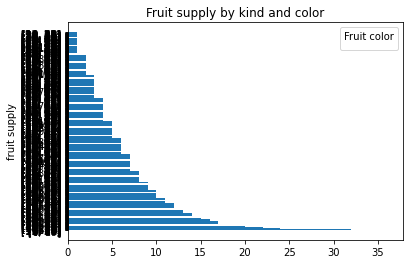

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

counts = list(chart_df.iloc[:, 2])

ax.barh(combinations, counts)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

In [ ]:
import xml.etree.ElementTree as gfg 
from xml.dom import minidom
import os

In [ ]:
def GenerateGEXF(fileName) :

    root = gfg.Element("graph")
      
    m1 = gfg.Element("nodes")
    root.append (m1)
      
    b1 = gfg.SubElement(m1, "brand")
    b1.text = "Redmi"
    b2 = gfg.SubElement(m1, "price")
    b2.text = "6999"
      
    m2 = gfg.Element("edges")
    root.append (m2)
      
    c1 = gfg.SubElement(m2, "brand")
    c1.text = "Samsung"
    c2 = gfg.SubElement(m2, "price")
    c2.text = "9999"
      
    tree = gfg.ElementTree(root)
      
    with open (fileName, "wb") as files :
        tree.write(files)

In [38]:
from jaal import Jaal

In [41]:
from jaal.datasets import load_got
Jaal(edge_df, node_df).plot() #vis_opts={'physics':{'stabilization':{'iterations': 100}}} define the convergence iteration of network

Parsing the data...Done
Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Sep/2022 12:00:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2022 12:00:13] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2022 12:00:13] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2022 12:00:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2022 12:00:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2022 12:00:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2022 12:00:13] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2022 12:00:13] "POST /_dash-update-component HTTP/1.1" 200 -


No trigger


127.0.0.1 - - [19/Sep/2022 12:00:18] "GET /_dash-component-suites/dash/dcc/dash_core_components-shared.js.map HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2022 12:00:18] "GET /_dash-component-suites/dash/html/dash_html_components.min.js.map HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2022 12:00:18] "GET /_dash-component-suites/dash/dash_table/bundle.js.map HTTP/1.1" 200 -
127.0.0.1 - - [19/Sep/2022 12:00:18] "GET /_dash-component-suites/dash/dcc/dash_core_components.js.map HTTP/1.1" 200 -


In [ ]:
json.dumps(json.JSONDecoder().decode(node_json))

In [ ]:
final_json = {"nodes": json.loads(node_json), "links": json.loads(edge_json)}

In [ ]:
final_json

In [ ]:
import json
with open('cluster_network_vis/data.json', 'w') as f:
    json.dump(final_json, f)
     
# Opening JSON file
f = open('cluster_network_vis/data.json')
final_json = json.load(f)

In [ ]:
root = minidom.Document()
  
graph = root.createElement('graph') 
root.appendChild(graph)
  
nodes = root.createElement('nodes')
graph.appendChild(nodes)

for i, node in node_df.iterrows():
    newNode = root.createElement('node')
    newNode.setAttribute('id', str(i))
    newNode.setAttribute('label', 'cluster')
    nodes.appendChild(newNode)

edges = root.createElement('edges')
graph.appendChild(edges)

for i, edge in edge_df.iterrows():
    newEdge = root.createElement('edge')
    newEdge.setAttribute('source', edge['from'])
    newEdge.setAttribute('target', edge['to'])
    edges.appendChild(newEdge)

xml_str = root.toprettyxml(indent ="\t") 
  
save_path_file = "gfg.xml"
  
with open(save_path_file, "w") as f:
    f.write(xml_str) 

In [ ]:
save_path_file = "cluster_network_vis/gfg.xml"

xml_str = gfg.parse(save_path_file)